In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Leemos los archivos transformados al formato requerido
dfTrain= pd.read_csv('tic_training_data.csv')
dfTest = pd.read_csv('tic_test_data.csv')

In [ ]:
dfTrain.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
dfTest.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#observamos los tipos de datos que tiene la data
dfTrain.dtypes

,0
MOSTYPE,int64
MAANTHUI,int64
MGEMOMV,int64
MGEMLEEF,int64
MOSHOOFD,int64
...,...
APLEZIER,int64
AFIETS,int64
AINBOED,int64
ABYSTAND,int64


In [ ]:
# Cálculo del porcentaje de valores únicos
porcentaje_unicos = dfTrain.nunique()/len(dfTrain) * 100  # para porcentaje real (0-100%)

mayores_50 = porcentaje_unicos[porcentaje_unicos>50]

print(mayores_50)


Series([], dtype: float64)


No hay ninguno

In [ ]:
#Calculo de porcentajes de nulos
porcentaje_vacios=dfTrain.isna().sum()/len(dfTrain)

mayores_20 = porcentaje_vacios[porcentaje_vacios>0]

print(mayores_20)


Series([], dtype: float64)


No hay ninguno vacio

In [ ]:
#Dimensión de la data de entrenamiento
dfTrain.shape

(5822, 86)

In [ ]:
#eliminamos los duplicados
dfTrain.drop_duplicates(keep="first", inplace=True)

In [ ]:
# vemos las dimensiones luego del duplicado
dfTrain.shape

(5220, 86)

## Porcentaje del target

In [ ]:
#Observamos la distribución de la variable target ("CARAVAN")
dfTrain['CARAVAN'].value_counts()/len(dfTrain) *100

,count
CARAVAN,
0,93.48659
1,6.51341


Observamos que esta muy desbalanceado

In [ ]:
dfTrain['MAANTHUI'].value_counts(normalize=True)

,proportion
MAANTHUI,
1,0.906705
2,0.084866
3,0.006513
7,0.000766
4,0.000383
5,0.000192
10,0.000192
8,0.000192
6,0.000192


In [ ]:
#Buscamos las variables con porcentaje de valores unicos mayores a 0.5
threshold = 0.50
n = len(dfTrain)
cols_valores_mayores_50 = {}

for col in dfTrain.columns:
    counts = dfTrain[col].value_counts(normalize=True)  # proporción de cada valor
    # Busca valores con proporción > 0.50
    valores_altos = counts[counts > threshold]
    if not valores_altos.empty:
        cols_valores_mayores_50[col] = valores_altos

# Mostrar resultados
for col, valores in cols_valores_mayores_50.items():
    print(f"Columna: {col}")
    print(valores)
    print("-" * 30)

print(len(cols_valores_mayores_50))

Columna: MAANTHUI
MAANTHUI
1    0.906705
Name: proportion, dtype: float64
------------------------------
Columna: MBERZELF
MBERZELF
0    0.715134
Name: proportion, dtype: float64
------------------------------
Columna: MBERBOER
MBERBOER
0    0.714559
Name: proportion, dtype: float64
------------------------------
Columna: MINK123M
MINK123M
0    0.837931
Name: proportion, dtype: float64
------------------------------
Columna: PWABEDR
PWABEDR
0    0.984291
Name: proportion, dtype: float64
------------------------------
Columna: PWALAND
PWALAND
0    0.977011
Name: proportion, dtype: float64
------------------------------
Columna: PBESAUT
PBESAUT
0    0.990805
Name: proportion, dtype: float64
------------------------------
Columna: PMOTSCO
PMOTSCO
0    0.957854
Name: proportion, dtype: float64
------------------------------
Columna: PVRAAUT
PVRAAUT
0    0.998276
Name: proportion, dtype: float64
------------------------------
Columna: PAANHANG
PAANHANG
0    0.987548
Name: proportion, dtype:

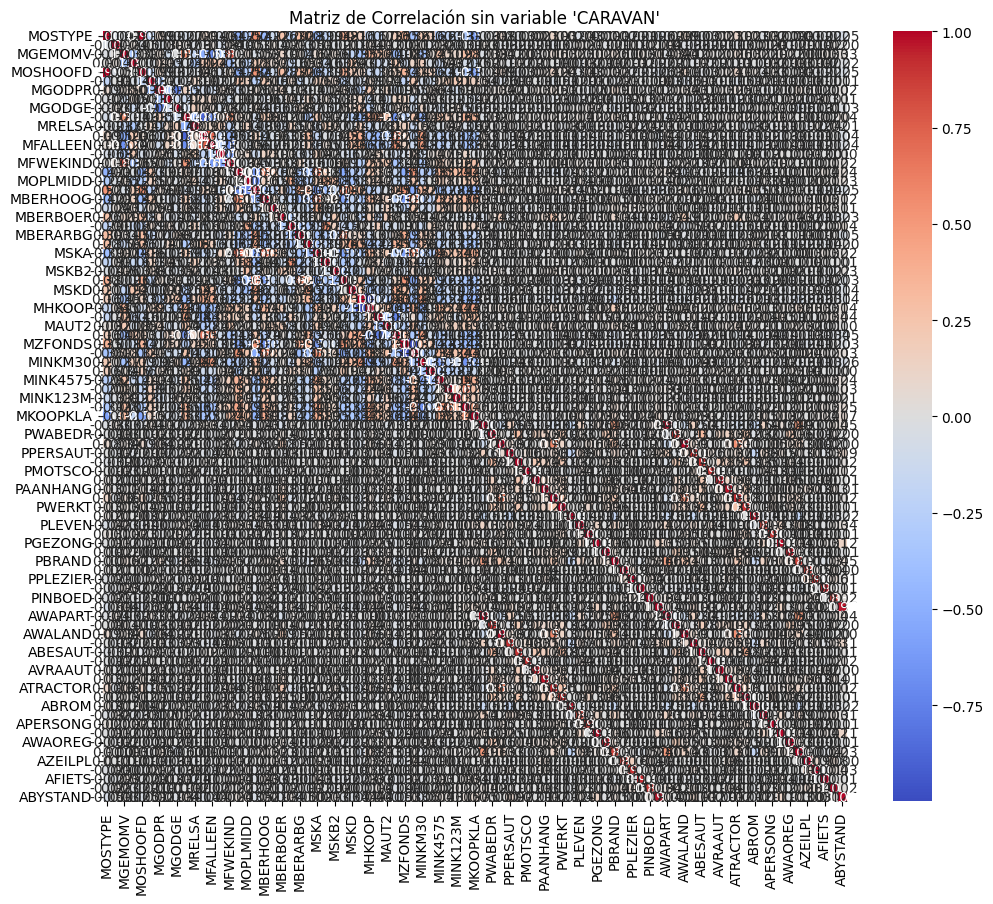

In [ ]:
#Realizamos la matriz de correlación de los datos pero sin CARAVAN
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame sin la columna 'CARAVAN'
df_sin_target = dfTrain.drop(columns=['CARAVAN'])

# Calcular matriz de correlación
corr_matrix = df_sin_target.corr()

# Visualizar matriz con heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación sin variable 'CARAVAN'")
plt.show()


In [ ]:
#Observamos variables estan correlacionadas con mas de 0.5
# Tomar la matriz absoluta para comparar
corr_abs = corr_matrix.abs()

# Crear un DataFrame para guardar pares con alta correlación
high_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_abs.iloc[i, j] > 0.5:  # umbral > 0.5
            high_corr.append({
                'Variable 1': corr_matrix.columns[i],
                'Variable 2': corr_matrix.columns[j],
                'Correlación': corr_matrix.iloc[i, j]
            })

high_corr_df = pd.DataFrame(high_corr).sort_values(by='Correlación', ascending=False)

print(high_corr_df)

   Variable 1 Variable 2  Correlación
0     MOSTYPE   MOSHOOFD     0.992801
50    PWALAND    AWALAND     0.987549
63    PGEZONG    AGEZONG     0.979954
47    PWAPART    AWAPART     0.979798
60      PBROM      ABROM     0.967607
..        ...        ...          ...
9      MGODPR     MGODGE    -0.741764
24   MOPLMIDD   MOPLLAAG    -0.743192
10     MRELGE     MRELOV    -0.888041
42    MZFONDS     MZPART    -0.999202
40     MHHUUR     MHKOOP    -0.999529

[72 rows x 3 columns]


In [ ]:
#separamos la variable a predecir de las demas caracteristicas
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train = dfTrain.drop(columns=['CARAVAN'])
y_train = dfTrain['CARAVAN']

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train) # fit solo con train
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)


# Entrenar PCA solo con train para reducir la dimencionalidad
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled_df)
X_train_pca_df = pd.DataFrame(X_train_pca)

In [ ]:
X_train_scaled_df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.690691,-0.268603,0.417138,-1.224224,0.789950,-0.697543,0.223870,-0.061668,-0.164419,0.433722,...,-0.214802,-0.077293,-0.085633,-0.063294,0.718509,-0.02398,-0.077806,-0.158125,-0.092288,-0.125583
1,0.999843,-0.268603,-0.843696,-1.224224,0.789950,0.283906,-0.357235,-0.061668,0.458417,-0.087944,...,-0.214802,-0.077293,-0.085633,-0.063294,0.718509,-0.02398,-0.077806,-0.158125,-0.092288,-0.125583
2,0.999843,-0.268603,-0.843696,-1.224224,0.789950,-0.697543,-0.357235,0.925772,0.458417,-1.652941,...,-0.214802,-0.077293,-0.085633,-0.063294,0.718509,-0.02398,-0.077806,-0.158125,-0.092288,-0.125583
3,-1.164220,-0.268603,0.417138,-0.002107,-0.948473,1.265355,-0.938340,0.925772,0.458417,-0.609609,...,-0.214802,-0.077293,-0.085633,-0.063294,0.718509,-0.02398,-0.077806,-0.158125,-0.092288,-0.125583
4,1.231707,-0.268603,1.677972,-1.224224,1.485319,0.283906,-0.357235,-0.061668,0.458417,0.433722,...,-0.214802,-0.077293,-0.085633,-0.063294,0.718509,-0.02398,-0.077806,-0.158125,-0.092288,-0.125583


In [ ]:
X_train_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.561100,-3.404729,-1.136441,0.833019,-0.021354,-0.230642,-0.207633,-0.056278,0.069167,0.511885,...,-0.098965,0.168352,-1.167978,0.227067,-0.786997,-0.253638,-0.343142,0.396271,-0.713701,0.401410
1,-0.536087,-0.063243,-0.583817,1.892438,0.883090,0.633307,-1.915743,-0.565725,-0.185660,-1.086972,...,-1.757310,-1.376417,-0.054504,-1.030207,1.473138,-0.749293,0.260104,-0.540453,-0.445263,-0.143498
2,2.933262,1.762132,0.044526,2.260868,2.724269,2.824953,-1.893768,0.882308,-0.544309,0.144479,...,-0.840531,1.340093,-1.128289,-0.566535,-0.659519,0.090352,0.022944,0.880182,1.078214,-0.442174
3,-1.487938,1.165645,-0.566830,0.211336,1.539736,1.576930,0.189976,-0.292737,0.567969,0.743913,...,1.058722,0.546859,-1.136192,1.123157,0.198481,0.176028,-0.508491,0.641589,-0.204013,-0.325293
4,-4.275385,0.166044,1.137870,-1.018613,-2.998126,-1.460073,-0.260447,-1.094577,0.698200,-0.855236,...,-0.286722,2.488842,0.526830,-0.746164,-2.639748,1.665958,-1.304167,-0.689746,-1.378775,-2.032703


In [ ]:
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#Separamos la data de prueba y la data de validación
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_pca_df, y_train, stratify=y_train, test_size=0.2, random_state=42
)

#Establecemos los parametros a probar con el random_grid
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 8, 10, 12, None]  # 'auto' = sqrt
max_depth = [int(x) for x in np.linspace(10, 110, num=11)] + [None]
min_samples_leaf = [1, 2, 4]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'class_weight': ['balanced']
}
#impimimos los valores a probar
print('Los valores a probar en la búsqueda aleatoria son:')
pprint(random_grid)
#imprimimos la cantidad de modelos creados
total_models = (len(n_estimators) * len(max_features) * len(max_depth) * len(min_samples_leaf) * len(random_grid['class_weight']))
print(f"\nSi se probaran todas las combinaciones se requeriría entrenar {total_models} modelos\n")

#Establecemos el modelo a usar
rf = RandomForestClassifier(oob_score=True, random_state=42)
#Usamos RandomizedSearchCV buscando los mejores parametros
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=2,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#entrenamos el modelo
rf_random.fit(X_train_split, y_train_split)

#encontramos el mejor modelo
rf_random_best = rf_random.best_estimator_
#imprimimos los mejores parametros
print('Los hiperparámetros del mejor modelo son:')
pprint(rf_random.best_params_)
print()
#impimimos las metricas
print('Exactitud luego de búsqueda aleatoria en entrenamiento:', rf_random_best.score(X_train_split, y_train_split))
print('Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag):', rf_random_best.oob_score_)
print('Exactitud luego de búsqueda aleatoria en validación:', rf_random_best.score(X_val, y_val))
print()

#Imprimimos el AUC-ROC
y_val_pred = rf_random_best.predict(X_val)
y_val_proba = rf_random_best.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_val_pred))
print("AUC ROC:", roc_auc_score(y_val, y_val_proba))


Los valores a probar en la búsqueda aleatoria son:
{'class_weight': ['balanced'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 8, 10, 12, None],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

Si se probaran todas las combinaciones se requeriría entrenar 1800 modelos

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Los hiperparámetros del mejor modelo son:
{'class_weight': 'balanced',
 'max_depth': 80,
 'max_features': 10,
 'min_samples_leaf': 2,
 'n_estimators': 1400}

Exactitud luego de búsqueda aleatoria en entrenamiento: 0.9918582375478927
Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag): 0.9243295019157088
Exactitud luego de búsqueda aleatoria en validación: 0.9252873563218391

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       976
           1       0.00      0.00      0.00        68

    a

## TEST

In [ ]:
# Cálculo del porcentaje de valores únicos de la data de prueba
porcentaje_unicos = dfTest.nunique()/len(dfTest) * 100

mayores_50 = porcentaje_unicos[porcentaje_unicos>50]

print(mayores_50)

Series([], dtype: float64)


In [ ]:
#Cálculo del porcentaje de valores nulos en la data de prueba
porcentaje_vacios=dfTest.isna().sum()/len(dfTest)

mayores_20 = porcentaje_vacios[porcentaje_vacios>0]

print(mayores_20)

Series([], dtype: float64)


In [ ]:
#Leemos la data que contiene los valores de caravan de la data de prueba
y_test_real = pd.read_csv('tictgts2000.txt', header=None)
y_test_real.head()

,0
0,0
1,1
2,0
3,0
4,0


In [ ]:
dfTest.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,0,0,0,1,0,0,0,0,0,1
2,39,1,3,3,9,1,4,2,3,5,...,0,0,0,1,0,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#añadir la unica columna que tiene y_test_real  a dfTest
dfTest['CARAVAN'] = y_test_real
dfTest.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,0,0,0,1,0,0,0,0,0,1
2,39,1,3,3,9,1,4,2,3,5,...,0,0,0,1,0,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
dfTest.shape

(3730, 86)

In [ ]:
#eliminamos los duplicados
dfTest.drop_duplicates(keep="first", inplace=True)

In [ ]:
dfTest.shape

(3730, 86)

In [ ]:

# Para el test separamos la caracteristica objetivo de las demas
X_test = dfTest.drop(columns=['CARAVAN'])
y_test = dfTest['CARAVAN']

# Escalamos los datos
X_test_scaled = scaler.transform(X_test)       # transform usando scaler entrenado
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

#reducimos la dimensiones con PCA
X_test_pca = pca.transform(X_test_scaled_df)      # transform usando PCA entrenado
X_test_pca_df = pd.DataFrame(X_test_pca)

In [ ]:
X_test_scaled_df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.690691,-0.268603,1.677972,-1.224224,0.789950,-0.697543,0.804976,-1.049108,-0.164419,-0.609609,...,-0.214802,-0.077293,-0.085633,-0.063294,0.718509,-0.02398,-0.077806,-0.158125,-0.092288,-0.125583
1,-1.396084,-0.268603,0.417138,-1.224224,-1.296157,-0.697543,0.223870,-1.049108,0.458417,-0.609609,...,4.813290,-0.077293,-0.085633,-0.063294,0.718509,-0.02398,-0.077806,-0.158125,-0.092288,-0.125583
2,1.154419,-0.268603,0.417138,-0.002107,1.137634,0.283906,-0.357235,0.925772,-0.164419,-0.609609,...,2.299244,-0.077293,-0.085633,-0.063294,0.718509,-0.02398,-0.077806,-0.158125,-0.092288,-0.125583
3,-1.164220,-0.268603,-0.843696,-0.002107,-0.948473,1.265355,-0.938340,0.925772,0.458417,-0.609609,...,-0.214802,-0.077293,-0.085633,-0.063294,0.718509,-0.02398,-0.077806,-0.158125,-0.092288,-0.125583
4,0.536115,-0.268603,-0.843696,1.220009,0.442265,-0.697543,-1.519446,-1.049108,2.326924,1.477054,...,-0.214802,-0.077293,-0.085633,-0.063294,0.718509,-0.02398,-0.077806,-0.158125,-0.092288,-0.125583


In [ ]:
X_test_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1.404112,-2.953844,-1.303722,1.184747,-0.204144,-0.993027,-0.977032,-1.221605,0.141720,-0.887473,...,-0.704540,-0.085057,-1.626268,0.036295,-0.489722,0.455943,-0.445787,0.186110,0.737905,-0.610650
1,-4.989119,1.408775,0.015482,3.920191,1.970275,0.803912,1.570168,-0.858185,1.232003,2.081801,...,-0.902525,-1.308009,-1.298584,-1.897469,-0.379784,0.860237,0.753304,0.841918,1.116946,-0.963431
2,-0.704601,-0.438554,0.773550,3.122282,-0.113303,-0.201898,-0.155199,-0.388622,-0.122357,-0.581688,...,0.499329,0.280591,0.154089,0.827837,-0.039727,0.505784,0.241303,0.477436,0.151604,-0.332966
3,-1.145572,1.534701,0.335758,1.813623,0.885893,0.961065,-0.974806,-0.263370,0.368600,-0.007512,...,2.048153,0.152317,0.374345,-0.092326,0.497485,0.691360,-0.495469,0.323934,0.750367,-1.194075
4,4.236395,-1.926721,-1.770528,0.982137,-0.050334,-1.316911,0.058364,-1.085033,0.316409,0.226942,...,-0.578744,-0.573596,0.429054,-1.144719,-0.202999,-0.527155,-0.572982,-0.649963,0.319797,0.055422


In [ ]:
# Evaluar con métricas detalladas en validación
y_test_pred = rf_random_best.predict(X_test_pca_df)
y_test_proba = rf_random_best.predict_proba(X_test_pca_df)[:, 1]

print(classification_report(y_test, y_test_pred))
print("AUC ROC:", roc_auc_score(y_test, y_test_proba))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3492
           1       0.24      0.05      0.08       238

    accuracy                           0.93      3730
   macro avg       0.59      0.52      0.52      3730
weighted avg       0.89      0.93      0.91      3730

AUC ROC: 0.6962871918526862


OBTENEMOS FINALMENTE UN AUC-ROC DE 0.696 con la data de prueba